# Python GIS

In [25]:
!pip install ../trampact.iris_coord

ERROR: Could not find a version that satisfies the requirement trampact.iris_coord (from versions: none)
ERROR: No matching distribution found for trampact.iris_coord


In [26]:
!pwd

/home/mchistya/code/eangelid/trampact/notebooks


In [24]:
import pandas as pd
from shapely.geometry import Point, LineString, Polygon
import geopandas as gpd
import ipyleaflet

from trampact.iris_coord import Iris

ModuleNotFoundError: No module named 'trampact'

In [6]:
df=pd.read_csv('../raw_data/bpe_t2_clean.csv')
df.drop(columns='Unnamed: 0',inplace=True)
df.tail(2)

,iris_id,iris_type,iris_with_t1,iris_with_t2,AN,longitude,latitude,"('LAB', 'is_sport')","('LAB', 'is_leasure')","('LAB', 'is_medical')",...,"('LAB', 'is_commerce_spec')","('LAB', 'is_grande_surface')","('LAB', 'is_high_educ')","('LAB', 'is_schools')","('LAB', 'is_transport')",Q_XY_acceptable,Q_XY_bonne,Q_XY_mauvaise,LAB,CLASSE
11417,61230101,A,0,1,2018,7.197679,43.659326,0,0,0,...,1,0,0,0,0,0.0,1.0,0.0,Psychologue,Santé
11418,61230101,A,0,1,2018,7.197874,43.659079,0,0,0,...,1,0,0,0,0,1.0,0.0,0.0,Hôtel,Tourisme


In [8]:
points =[]
for i in range(len(df)):
    t=Point(df.loc[i,'longitude'],df.loc[i,'latitude'])
    points.append(t)
print(points[0])

POINT (7.178601702949741 43.6586357455608)


In [9]:
df['dots']=points

In [10]:
df.head(2)

,iris_id,iris_type,iris_with_t1,iris_with_t2,AN,longitude,latitude,"('LAB', 'is_sport')","('LAB', 'is_leasure')","('LAB', 'is_medical')",...,"('LAB', 'is_grande_surface')","('LAB', 'is_high_educ')","('LAB', 'is_schools')","('LAB', 'is_transport')",Q_XY_acceptable,Q_XY_bonne,Q_XY_mauvaise,LAB,CLASSE,dots
0,61230102,H,0,1,2018,7.178602,43.658636,0,1,0,...,0,0,0,0,0.0,1.0,0.0,Électricien,Services a,POINT (7.178601702949741 43.6586357455608)
1,61230102,H,0,1,2018,7.178602,43.658636,0,0,1,...,0,0,0,0,0.0,1.0,0.0,Agence immobilière,Services a,POINT (7.178601702949741 43.6586357455608)


In [11]:
df.iris_id=df.iris_id.map(lambda x: str(0)+str(x))

In [14]:
iris_list=list(pd.unique(df.iris_id))
len(iris_list)

100

In [15]:
point_dist = point1.distance(point2)
point_dist # the returned distance is based on the projection of the points degrees in WGS84
print("Distance between the points is {0:.2f} decimal degrees".format(point_dist))

Distance between the points is 0.02 decimal degrees


In [16]:
# It is also possible to use coordinate tuples having the same outcome
line = LineString([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])

In [17]:
line_t1 = pd.read_csv('gs://trampact_storage/data/coord_T1.csv')
line_t1.drop(columns='Unnamed: 0',inplace=True)

In [18]:
line_t1.head(7)

,y,x
0,43.723348,7.285484
1,43.722790,7.290817
2,43.722704,7.291874
3,43.720651,7.291798
4,43.719062,7.291645
5,43.715879,7.292795
6,43.712934,7.292888


In [19]:
points_t1 =[]
for i in range(len(line_t1)):
    t=Point(line_t1.loc[i,'x'],line_t1.loc[i,'y'])
    points_t1.append(t)
print(points_t1[0])

POINT (7.285484 43.723348)


In [20]:
line_t1['points_t1']=points_t1

In [21]:
line_t1.head(2)

,y,x,points_t1
0,43.723348,7.285484,POINT (7.285484 43.723348)
1,43.722790,7.290817,POINT (7.290817 43.72279)


In [22]:
type(line_t1)

pandas.core.frame.DataFrame

In [23]:
line_t1=line_t1.to_crs(world.crs)

AttributeError: 'DataFrame' object has no attribute 'to_crs'

In [51]:
print(line_t1['points_t1'][0])

POINT (7.285484 43.723348)


## Trace Line1

In [56]:
line=[]
for i in range(len(line_t1)):
    t=(line_t1.loc[i,'x'],line_t1.loc[i,'y'])
    line.append(t)
line[0]

(7.285484, 43.723348)

In [57]:
line_t1=LineString(line)

In [256]:
line_t1.head(3)

,y,x
0,43.723348,7.285484
1,43.722790,7.290817
2,43.722704,7.291874


In [247]:
type(line_t1)

shapely.geometry.linestring.LineString

In [2]:
line_t1

NameError: name 'line_t1' is not defined

# Iris poly dict

In [73]:
import shapefile as sp
from dbfread import DBF

In [74]:
class Iris():
    
    def __init__(self):
        self.get_files()
        self.get_records()
        self.get_iris_id()
    
    def get_files(self):
        #client = storage.Client().bucket('trampact_storage')

        #path_dbf = "gs://{}/{}/{}".format(bucket_name, path,'IRIS_GEO_2018_FRTOT.dbf')
        #path_shp = 'gs://{}/{}/{}'.format(bucket_name, path,'IRIS_GEO_2018_FRTOT.shp')
        
        path_dbf ='../raw_data/iris_geo/IRIS_GEO_2018_FRTOT.dbf'
        path_shp ='../raw_data/iris_geo/IRIS_GEO_2018_FRTOT.shp'

        self.dbf=DBF(path_dbf)
        self.shp = sp.Reader(path_shp)


    def get_records(self):
        records = []
        for record in self.dbf:
            records.append(dict(record))
        self.records = records

    def get_iris_id(self):
        iris_id = []
        for i in range(len(self.records)):
            r = self.records[i]['CODE_IRIS']
            iris_id.append(r)
        self.iris_id = iris_id
        
    def get_iris_type(self, iris_id):
        iris_type = {}
        for i in range(len(self.records)):
            iris_type[self.iris_id[i]]= self.records[i]['TYP_IRIS']
        self.iris_type = iris_type
        return iris_type[str(iris_id)]

    def get_box_coord(self, iris_id):
        shapes = self.shp.shapes()
        box_coord = {}
        for i in range(len(shapes)):
            box_coord[self.iris_id[i]] = shapes[i].bbox
        return box_coord[str(iris_id)]

    def get_poly_coord(self, iris_id):
        shapes = self.shp.shapes()
        poly_coord = {}
        for i in range(len(shapes)):
            poly_coord[self.iris_id[i]] = shapes[i].__geo_interface__['coordinates'][0]
        return poly_coord[str(iris_id)]   


In [75]:
iris=Iris()

In [96]:
iris_poly_dict ={}
for i in iris_list:
    iris_poly_dict[i]=iris.get_poly_coord(i)

In [97]:
iris_poly_dict

{'061230102': [(7.1959856577413905, 43.657056921357864),
  (7.195774097395779, 43.657065992095006),
  (7.195120754484691, 43.65739758301561),
  (7.194833551511202, 43.657560051058),
  (7.194604792125985, 43.657656286168724),
  (7.194355625604026, 43.65772807856572),
  (7.19387768781273, 43.65779428344968),
  (7.193202093073009, 43.65777980935637),
  (7.191494019422693, 43.65771595845033),
  (7.1882219273478, 43.65752135155024),
  (7.187093641155197, 43.65687871961938),
  (7.18633913867987, 43.6561026458479),
  (7.1852944755250086, 43.65536797601021),
  (7.1830024944084485, 43.65467411678529),
  (7.182394819463242, 43.654492969156706),
  (7.181871664131455, 43.65438155116909),
  (7.181410282498435, 43.65431731173908),
  (7.180973473022749, 43.654283661940674),
  (7.180437014168877, 43.654261954066214),
  (7.179552440267169, 43.654299589250094),
  (7.179137816889379, 43.65434887714709),
  (7.178922952613091, 43.654380568918384),
  (7.178760720180186, 43.654419246629345),
  (7.17868363927

## poly dict to df

In [166]:
polygone_df=pd.DataFrame(iris_poly_dict.items(),columns=['iris_id','iris_poly'])
polygone_df.head(3)

,iris_id,iris_poly
0,061230102,"[(7.1959856577413905, 43.657056921357864), (7...."
1,060880301,"[(7.282884154602891, 43.70396769966534), (7.28..."
2,060880303,"[(7.282884154602891, 43.70396769966534), (7.28..."


In [167]:
type(polygone_df)

pandas.core.frame.DataFrame

## Make forms out of dict values

In [204]:
agg_t2=pd.read_csv('../raw_data/bpe_t2_agg_iris_clean.csv')

In [205]:
agg_t2

,Unnamed: 0,LAB,LAB.1,LAB.2,LAB.3,LAB.4,LAB.5,LAB.6,LAB.7,LAB.8,LAB.9,LAB.10,LAB.11,iris_with_t1,iris_with_t2
0,NaN,count_sport,count_leasure,count_medical,count_socio_med,count_tourist,count_general_service,count_commerce,count_commerce_spec,count_grande_surface,count_high_educ,count_schools,count_transport,NaN,NaN
1,iris_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,060880101,0,1,27,1,7,2,35,190,6,2,4,1,0.0,1.0
3,060880102,0,1,17,0,2,0,40,226,2,0,0,1,1.0,1.0
4,060880103,6,0,17,1,3,0,37,115,3,0,2,2,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,061230107,0,0,41,0,3,3,40,71,13,0,6,4,0.0,1.0
98,061230108,2,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0
99,061230109,1,0,0,0,0,0,1,1,0,0,1,0,0.0,0.0
100,061230110,3,0,0,0,0,0,0,0,1,0,0,0,0.0,0.0


In [206]:
agg_t2.columns=agg_t2.iloc[0]
agg_t2.drop(agg_t2.index[[0,1]],inplace=True)

In [207]:
agg_t2.head(3)

,NaN,count_sport,count_leasure,count_medical,count_socio_med,count_tourist,count_general_service,count_commerce,count_commerce_spec,count_grande_surface,count_high_educ,count_schools,count_transport,NaN,NaN
2,060880101,0,1,27,1,7,2,35,190,6,2,4,1,0.0,1.0
3,060880102,0,1,17,0,2,0,40,226,2,0,0,1,1.0,1.0
4,060880103,6,0,17,1,3,0,37,115,3,0,2,2,1.0,1.0


In [212]:
agg_t2.rename(columns={list(agg_t2)[0]:'iris_id',list(agg_t2)[-2]:'iris_with_t1',list(agg_t2)[-1]:'iris_with_t2'},inplace=True)
agg_t2

,iris_id,count_sport,count_leasure,count_medical,count_socio_med,count_tourist,count_general_service,count_commerce,count_commerce_spec,count_grande_surface,count_high_educ,count_schools,count_transport,iris_with_t1,iris_with_t2
2,060880101,0,1,27,1,7,2,35,190,6,2,4,1,0.0,1.0
3,060880102,0,1,17,0,2,0,40,226,2,0,0,1,1.0,1.0
4,060880103,6,0,17,1,3,0,37,115,3,0,2,2,1.0,1.0
5,060880201,2,2,68,1,4,1,50,121,10,0,4,7,1.0,1.0
6,060880202,1,0,21,0,8,1,21,83,11,2,3,7,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,061230107,0,0,41,0,3,3,40,71,13,0,6,4,0.0,1.0
98,061230108,2,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0
99,061230109,1,0,0,0,0,0,1,1,0,0,1,0,0.0,0.0
100,061230110,3,0,0,0,0,0,0,0,1,0,0,0,0.0,0.0


In [176]:
zipfile = "../raw_data/iris_geo/iris-geo-2018-frtot.zip"
gdf = gpd.read_file(zipfile)

In [236]:
type(gdf)

geopandas.geodataframe.GeoDataFrame

In [177]:
gdf

,INSEE_COM,NOM_COM,IRIS,CODE_IRIS,NOM_IRIS,TYP_IRIS,geometry
0,72191,Mayet,0000,721910000,Mayet,Z,"POLYGON ((0.30241 47.79701, 0.30303 47.79657, ..."
1,77248,Lesches,0000,772480000,Lesches,Z,"POLYGON ((2.80560 48.91735, 2.80567 48.91716, ..."
2,51426,Péas,0000,514260000,Péas,Z,"POLYGON ((3.80329 48.74375, 3.79938 48.74429, ..."
3,81199,Padiès,0000,811990000,Padiès,Z,"POLYGON ((2.39472 44.03456, 2.39463 44.03457, ..."
4,59225,Feignies,0102,592250102,Sud,H,"POLYGON ((3.94854 50.29482, 3.94817 50.29468, ..."
...,...,...,...,...,...,...,...
49759,97611,Mamoudzou,0206,976110206,Mtsapéré-Doujani-Carrière,H,"POLYGON ((45.19928 -12.78985, 45.19934 -12.789..."
49760,97602,Bandraboua,0100,976020100,Bandraboua,H,"POLYGON ((45.09764 -12.71079, 45.09352 -12.701..."
49761,97610,Koungou,0600,976100600,Majicavo-Lamir,H,"POLYGON ((45.22846 -12.74984, 45.22845 -12.749..."
49762,97616,Sada,0102,976160102,Mandrajou-Gendarmerie,H,"POLYGON ((45.11086 -12.84876, 45.10879 -12.848..."


In [187]:
df.head()

,iris_id,iris_type,iris_with_t1,iris_with_t2,AN,longitude,latitude,"('LAB', 'is_sport')","('LAB', 'is_leasure')","('LAB', 'is_medical')",...,"('LAB', 'is_grande_surface')","('LAB', 'is_high_educ')","('LAB', 'is_schools')","('LAB', 'is_transport')",Q_XY_acceptable,Q_XY_bonne,Q_XY_mauvaise,LAB,CLASSE,dots
0,061230102,H,0,1,2018,7.178602,43.658636,0,1,0,...,0,0,0,0,0.0,1.0,0.0,Électricien,Services a,POINT (7.178601702949741 43.6586357455608)
1,061230102,H,0,1,2018,7.178602,43.658636,0,0,1,...,0,0,0,0,0.0,1.0,0.0,Agence immobilière,Services a,POINT (7.178601702949741 43.6586357455608)
2,061230102,H,0,1,2018,7.178602,43.658636,0,0,0,...,0,0,0,0,0.0,1.0,0.0,Taxi,Transport,POINT (7.178601702949741 43.6586357455608)
3,061230102,H,0,1,2018,7.178602,43.658636,0,0,0,...,0,0,0,0,0.0,1.0,0.0,Taxi,Transport,POINT (7.178601702949741 43.6586357455608)
4,060880301,H,1,1,2018,7.283691,43.706875,0,0,0,...,0,0,0,0,0.0,1.0,0.0,"Banque, Caisse d'épargne",Services a,POINT (7.283690599762412 43.70687549635005)


In [238]:
join_df=gdf.merge(agg_t2,how='inner',right_on='iris_id',left_on='CODE_IRIS')

In [239]:
type(join_df)

geopandas.geodataframe.GeoDataFrame

In [241]:
join_df['area']=join_df.area

<ipython-input-241-6105ae9151be>:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  join_df['area']=join_df.area


In [242]:
join_df.head()

,INSEE_COM,NOM_COM,IRIS,CODE_IRIS,NOM_IRIS,TYP_IRIS,geometry,iris_id,count_sport,count_leasure,...,count_general_service,count_commerce,count_commerce_spec,count_grande_surface,count_high_educ,count_schools,count_transport,iris_with_t1,iris_with_t2,area
0,06088,Nice,2905,060882905,La Victorine-Grinda,H,"POLYGON ((7.21943 43.67236, 7.21937 43.67232, ...",060882905,0,0,...,0,6,7,0,0,0,6,0.0,1.0,0.000026
1,06088,Nice,0205,060880205,Riquier-Fontaine de la Ville,H,"POLYGON ((7.28650 43.70286, 7.28781 43.70246, ...",060880205,0,0,...,0,23,36,9,0,0,6,0.0,1.0,0.000007
2,06088,Nice,0401,060880401,Mont Boron,H,"POLYGON ((7.30850 43.69291, 7.30874 43.69292, ...",060880401,0,0,...,0,3,24,4,0,2,5,0.0,1.0,0.000145
3,06088,Nice,3102,060883102,Parc des Sports,H,"POLYGON ((7.20581 43.67808, 7.20551 43.67800, ...",060883102,9,0,...,1,16,34,21,0,9,13,0.0,1.0,0.000248
4,06088,Nice,3001,060883001,Arenas-Aeroport,A,"POLYGON ((7.20012 43.66450, 7.20027 43.66456, ...",060883001,0,1,...,15,31,98,32,0,6,27,0.0,1.0,0.000479


In [245]:
len(pd.unique(agg_t2['count_commerce']))

34

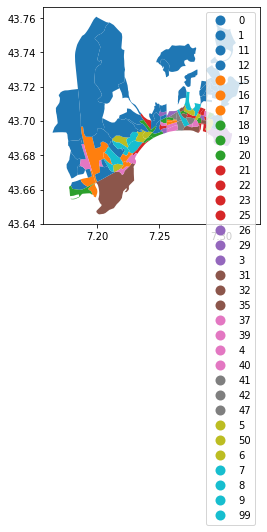

In [260]:
my_map=join_df.plot("count_commerce", legend=True)
#line_t1.plot()

In [234]:
join_df.drop(columns=['INSEE_COM','NOM_COM','IRIS','CODE_IRIS','NOM_IRIS'],inplace=True)


In [235]:
type(join_df)

pandas.core.frame.DataFrame

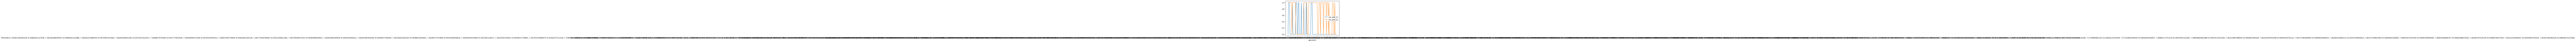

In [230]:
join_df.plot("geometry", legend=True)
join_df.plot

In [181]:
!pip install mapclassify

In [222]:
len(pd.unique(join_df.count_commerce))

34

In [221]:
join_df.count_commerce.value_counts();

AttributeError: 'Line2D' object has no property 'column'

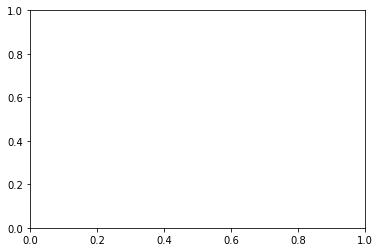

In [223]:
import matplotlib.pyplot as plt
import mapclassify

# Plot using 9 classes and classify the values using "Fisher Jenks" classification
join_df.plot(column="count_commerce", scheme="Fisher_Jenks", k=34, cmap="RdYlBu", linewidth=0);

# Use tight layour
plt.tight_layout()

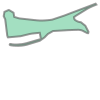

In [160]:
p0=Polygon(iris_poly_dict['061230102'])
p0

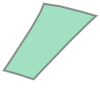

In [161]:
p1=Polygon(list(iris_poly_dict.values())[1])
p1

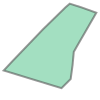

In [162]:
p2=Polygon(list(iris_poly_dict.values())[2])
p2

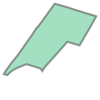

In [163]:
p3=Polygon(list(iris_poly_dict.values())[3])
p3

In [229]:

for i in iris_list[:3]:
    print(type(Polygon(iris_poly_dict[i])))

<class 'shapely.geometry.polygon.Polygon'>
<class 'shapely.geometry.polygon.Polygon'>
<class 'shapely.geometry.polygon.Polygon'>


In [164]:
df.head(3)

,iris_id,iris_type,iris_with_t1,iris_with_t2,AN,longitude,latitude,"('LAB', 'is_sport')","('LAB', 'is_leasure')","('LAB', 'is_medical')",...,"('LAB', 'is_grande_surface')","('LAB', 'is_high_educ')","('LAB', 'is_schools')","('LAB', 'is_transport')",Q_XY_acceptable,Q_XY_bonne,Q_XY_mauvaise,LAB,CLASSE,dots
0,061230102,H,0,1,2018,7.178602,43.658636,0,1,0,...,0,0,0,0,0.0,1.0,0.0,Électricien,Services a,POINT (7.178601702949741 43.6586357455608)
1,061230102,H,0,1,2018,7.178602,43.658636,0,0,1,...,0,0,0,0,0.0,1.0,0.0,Agence immobilière,Services a,POINT (7.178601702949741 43.6586357455608)
2,061230102,H,0,1,2018,7.178602,43.658636,0,0,0,...,0,0,0,0,0.0,1.0,0.0,Taxi,Transport,POINT (7.178601702949741 43.6586357455608)


In [ ]:
data_proj = data.copy()

In [ ]:
data_proj = data_proj.to_crs(epsg=3035)

import matplotlib.pyplot as plt

# Plot the WGS84
data.plot(facecolor='gray');

# Add title
plt.title("WGS84 projection");

# Remove empty white space around the plot
plt.tight_layout()

# Plot the one with ETRS-LAEA projection
data_proj.plot(facecolor='blue');

# Add title
plt.title("ETRS Lambert Azimuthal Equal Area projection");

# Remove empty white space around the plot
plt.tight_layout()

In [ ]:
# Convert DataFrame into a GeoDataFrame
geo = gpd.GeoDataFrame(data, geometry='geometry', crs=from_epsg(4326))

>>> type(geo)
geopandas.geodataframe.GeoDataFrame

>>> geo.crs
{'init': 'epsg:4326', 'no_defs': True}

In [258]:
!pwd

/home/mchistya/code/eangelid/trampact/notebooks


In [259]:
from trampact.iris_coord import Iris

ModuleNotFoundError: No module named 'trampact'